Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

* LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
* default - индикатор невозврата денежных средств

### Задание 1

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:
* a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 
* b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [108]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import scipy
from scipy import stats


In [8]:
raw_data = pd.read_csv('credit_card_default_analysis.csv')
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
print 'Размер датасета: {}'.format(raw_data.shape)

Размер датасета: (30000, 25)


In [11]:
d0_group = raw_data[raw_data['default']==0]
d1_group = raw_data[raw_data['default']==1]

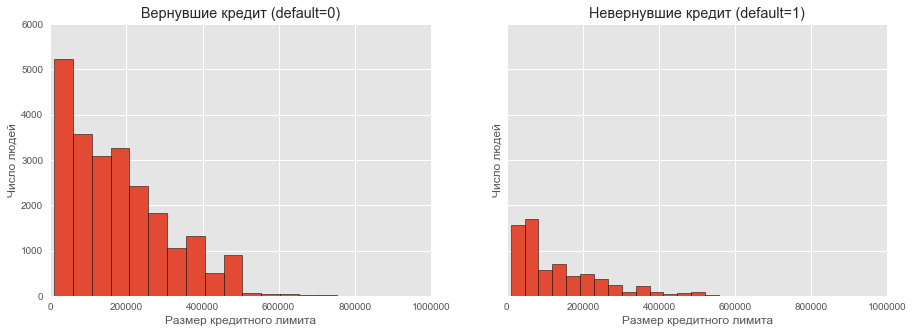

In [76]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)
data = [d0_group, d1_group]
title = [u'Вернувшие кредит (default=0)',u'Невернувшие кредит (default=1)']
for i in range(2):
    ax[i].hist(data[i].LIMIT_BAL.values, bins = 20,ec = 'black');
    ax[i].axis([0, 1e6, 0, 6000])
    ax[i].set_xlabel(u'Размер кредитного лимита')
    ax[i].set_ylabel(u'Число людей')
    ax[i].set_title(title[i])     

**а) Найдем медианные значения распределений:**

* Гипотеза H0 - медианы равны
* Гипотеза Н1 - медианы различны

In [28]:
print 'Медианное значение кредитного лимита для тех, кто вернул кредит: {}'.format(d0_group.LIMIT_BAL.median())
print 'Медианное значение кредитного лимита для тех, кто не вернул кредит: {}'.format(d1_group.LIMIT_BAL.median())

Медианное значение кредитного лимита для тех, кто вернул кредит: 150000.0
Медианное значение кредитного лимита для тех, кто не вернул кредит: 90000.0


Видно, что медианы различаются. Проверим доверительные интервалы распределений с помощью бутстрепа

In [30]:
def get_bootstrap_samples(data, n_samples):
    indicies = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indicies]
    return samples

In [31]:
def get_stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100*alpha/2., 100*(1-alpha/2.)])
    return boundaries

In [32]:
np.random.seed(0)
d0_median_scores = np.median(get_bootstrap_samples(d0_group.LIMIT_BAL.values, 1000), axis=0)
d1_median_scores =  np.median(get_bootstrap_samples(d1_group.LIMIT_BAL.values, 1000), axis=0)

In [33]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(d0_median_scores, d1_median_scores))

In [34]:
print "95% доверительный интервал для группы вернувших кредит: {}".format(get_stat_intervals(d0_median_scores, 0.05))
print "95% доверительный интервал для группы не вернувших кредит: {}".format(get_stat_intervals(d1_median_scores, 0.05))
print '95% доверительный интервал для разности групп: {}'.format(get_stat_intervals(delta_median_scores, 0.05))

95% доверительный интервал для группы вернувших кредит: [145000. 160000.]
95% доверительный интервал для группы не вернувших кредит: [ 80000. 100000.]
95% доверительный интервал для разности групп: [-80000. -50000.]


Интервалы не пересекаются, интрервал разности находится левее нуля. Различие статистически значимо. Гипотеза Н0 отвергается

Оценим практическую значимость

In [88]:
Fc = d0_group.LIMIT_BAL.median()/d1_group.LIMIT_BAL.median()
print 'Fold change: ', np.round(Fc, 3)

Fold change:  1.667


Разница практически значима

**б) Проверим равенство распределений с помощью критерия Манна - Уитни**

* Гипотеза H0 - распределения одинаковы
* Гипотеза Н1 - распределения отличаются на величину сдвига

In [40]:
stats.mannwhitneyu(d0_group.LIMIT_BAL.values, d1_group.LIMIT_BAL.values)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

На уровне значимости 0.05 гипотеза H0 уверенно отвергается

### Задание 2

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

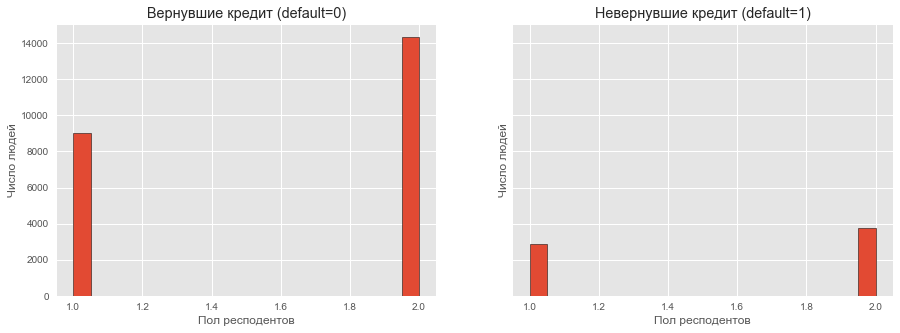

In [86]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)
data = [d0_group, d1_group]
title = [u'Вернувшие кредит (default=0)',u'Невернувшие кредит (default=1)']
for i in range(2):
    ax[i].hist(data[i].SEX.values, bins = 20,ec = 'black');
    #ax[i].axis([0, 1e6, 0, 6000])
    ax[i].set_xlabel(u'Пол респодентов')
    ax[i].set_ylabel(u'Число людей')
    ax[i].set_title(title[i])

* Гипотеза Н0 - гендерный состав в выборках не отличается
* Гипотеза Н1 - гендерный состав различается

Построим доверительный интервал и проверим гипотезу с помощью Z-критерия для доли двух независимых выборок

In [111]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):       
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [112]:
def proportions_diff_z_stat_ind(sample1, sample2):
    
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [113]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

Закодируем доли для использования в функциях

In [117]:
d0_zeros = np.zeros(len(d0_group[d0_group['SEX']==1].SEX.values))
d0_ones = np.ones(len(d0_group[d0_group['SEX']==2].SEX.values))

d1_zeros = np.zeros(len(d1_group[d1_group['SEX']==1].SEX.values))
d1_ones = np.ones(len(d1_group[d1_group['SEX']==2].SEX.values))

d0_group_sex_binary = np.concatenate([d0_zeros,d0_ones])
d1_group_sex_binary = np.concatenate([d1_zeros,d1_ones])

In [118]:
print len(d0_group_sex_binary), sum(d0_group_sex_binary)

23364 14349.0


In [121]:
print "95%% доверительный интервал: [%f, %f]" %\
      proportions_diff_confint_ind(d0_group_sex_binary, d1_group_sex_binary )

95% доверительный интервал: [0.033635, 0.060548]


Доверительный интервал не содержит нуля, гендерный состав отличается

In [120]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(d0_group_sex_binary, d1_group_sex_binary))

p-value: 0.000000


Гипотеза Н0 уверенно отвергается

### Задание 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

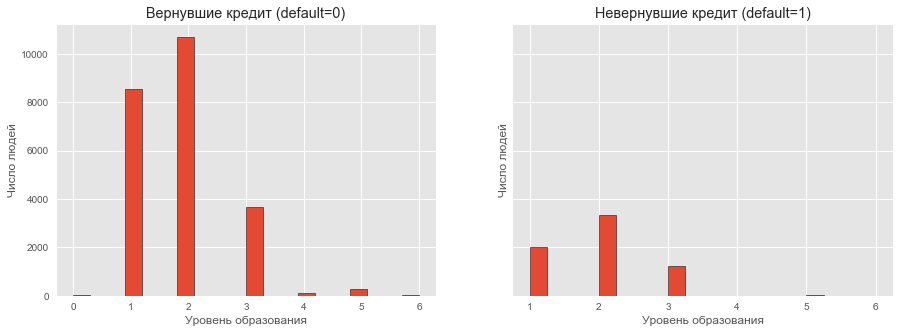

In [79]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)
data = [d0_group, d1_group]
title = [u'Вернувшие кредит (default=0)',u'Невернувшие кредит (default=1)']
for i in range(2):
    ax[i].hist(data[i].EDUCATION.values, bins = 20,ec = 'black');
    #ax[i].axis([0, 1e6, 0, 6000])
    ax[i].set_xlabel(u'Уровень образования')
    ax[i].set_ylabel(u'Число людей')
    ax[i].set_title(title[i])     

Проверим взаимосвзяь данных с помощью критерия хи квадрат для критериальных признаков

* Гипотеза Н0 - уровень образование не влияет на вероятность возврата долга
* Гипотеза Н1 - уровень образования влияет на это

In [212]:
table_edu = raw_data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='EDUCATION', aggfunc = len, fill_value=0)
table_edu.head()

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


In [224]:
# stats.chi2_contingency(table_edu.values)

In [203]:
print 'Значение уровня значимости: ', stats.chi2_contingency(table_edu.values)[1]

Значение уровня значимости:  8.825862457577375e-08


Гипотеза H0 отвергается, влияние есть

Отобразим диаграмму  ожидания/реальности при возврате долга

In [214]:
table_delta = table_edu.values - stats.chi2_contingency(table_edu.values)[3]


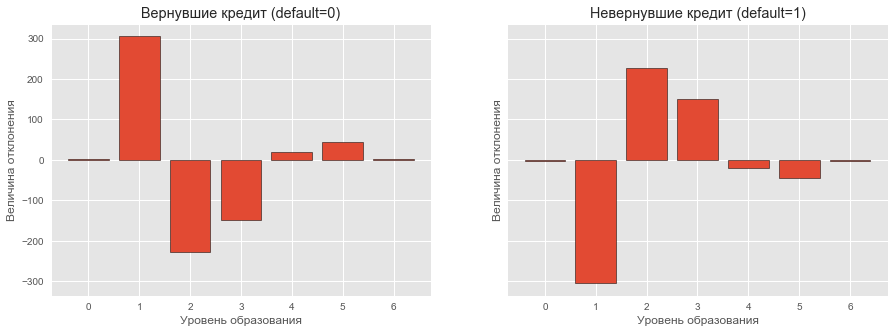

In [223]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)
data = [table_delta[0], table_delta[1]]
label = ['0', '1', '2', '3', '4', '5', '6']
title = [u'Вернувшие кредит (default=0)',u'Невернувшие кредит (default=1)']
for i in range(2):
    ax[i].bar(label, data[i], ec = 'black');
    #ax[i].axis([0, 1e6, 0, 6000])
    ax[i].set_xlabel(u'Уровень образования')
    ax[i].set_ylabel(u'Величина отклонения')
    ax[i].set_title(title[i])   

Масштабируем признаки

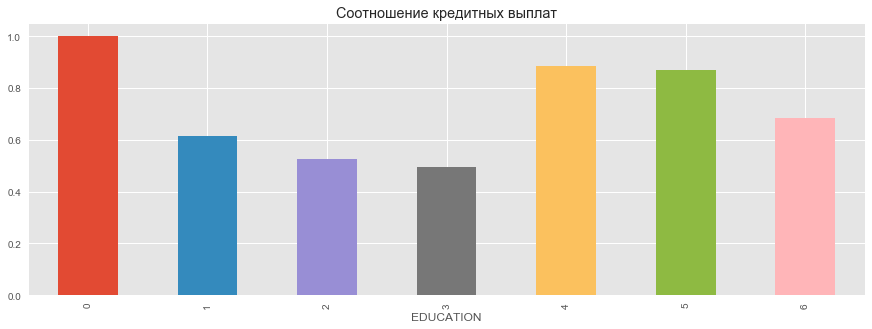

In [242]:
data_edu_scale = (table_edu.loc[0] - table_edu.loc[1])/(table_edu.loc[0]+table_edu.loc[1])
data_edu_scale.plot.bar(figsize = (15, 5))
plt.title(u'Соотношение кредитных выплат');

Видно, что 
* хуже всего кредиты возвращают группы 2 и 3: выпускник и начальное образование
* лучше всего кредиты возвращают респонденты из группы 0 -  доктора наук

### Задание 4

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

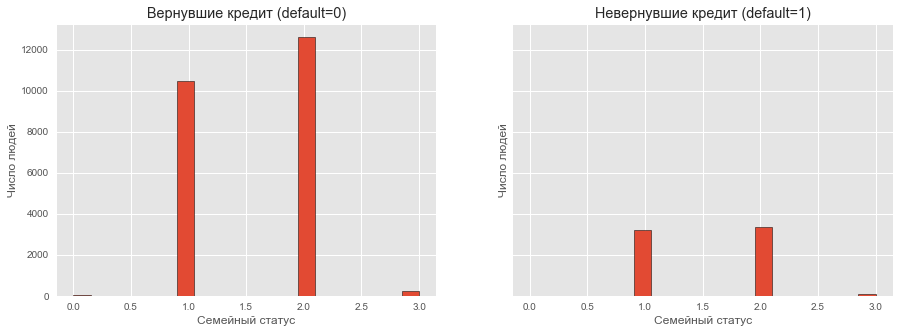

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)
data = [d0_group, d1_group]
title = [u'Вернувшие кредит (default=0)',u'Невернувшие кредит (default=1)']
for i in range(2):
    ax[i].hist(data[i].MARRIAGE.values, bins = 20,ec = 'black');
    #ax[i].axis([0, 1e6, 0, 6000])
    ax[i].set_xlabel(u'Семейный статус')
    ax[i].set_ylabel(u'Число людей')
    ax[i].set_title(title[i])     

* гипотеза Н0 - данные связаны между собой
* гипотеза Н1 - данные не связаны

Оценим значимость взаимосвязи с помощью критерия  хи-квадрат обобщенного на случай критериальных признаков

Подготовка матрицы сопряженности:

In [181]:
table_mar = raw_data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='MARRIAGE', aggfunc = len, fill_value=0)
table_mar.head()

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


Вычислим V коэфициент Крамера 

In [198]:
def cramers_stat(confusion_matrix):  
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [199]:
print 'Значение V коэффициента Крамера: ', cramers_stat(table_mar.values)

Значение V коэффициента Крамера:  0.034478203662766466


Коэффициент близок к нулю, данные слабо коррелируют друг с другом

In [189]:
print 'Значение уровня значимости: ', stats.chi2_contingency(table_mar)[1]

Значение уровня значимости:  8.825862457577375e-08


Гипотеза H0 отвергается, данные не связаны

### Задание 5

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

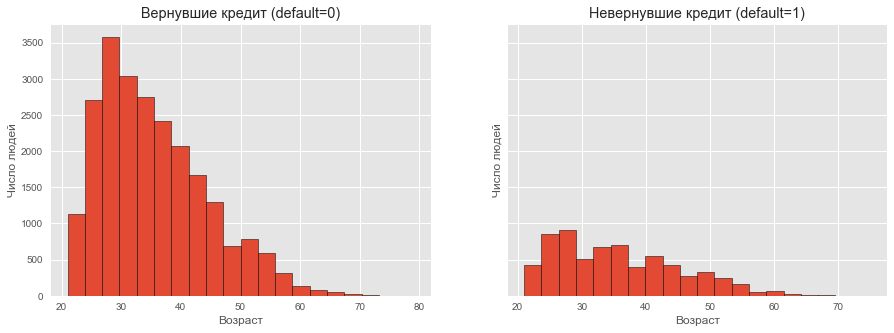

In [85]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)
data = [d0_group, d1_group]
title = [u'Вернувшие кредит (default=0)',u'Невернувшие кредит (default=1)']
for i in range(2):
    ax[i].hist(data[i].AGE.values, bins = 20,ec = 'black');
    #ax[i].axis([0, 1e6, 0, 6000])
    ax[i].set_xlabel(u'Возраст')
    ax[i].set_ylabel(u'Число людей')
    ax[i].set_title(title[i])     

**а) Найдем медианные значения распределений:**

* Гипотеза H0 - медианы распределений  равны
* Гипотеза Н1 - медианы распределений различны

In [129]:
print 'Медианное значение возраста тех, кто вернул кредит: {}'.format(d0_group.AGE.median())
print 'Медианное значение возраста тех, кто не вернул кредит: {}'.format(d1_group.AGE.median())

Медианное значение возраста тех, кто вернул кредит: 34.0
Медианное значение возраста тех, кто не вернул кредит: 34.0


Медианы равны. Построим доверительные интревалы с помощью бутстрепа:

In [131]:
np.random.seed(0)
d0_median_scores = np.median(get_bootstrap_samples(d0_group.AGE.values, 1000), axis=0)
d1_median_scores =  np.median(get_bootstrap_samples(d1_group.AGE.values, 1000), axis=0)
delta_median_scores = map(lambda x: x[1] - x[0], zip(d0_median_scores, d1_median_scores))

In [132]:
print "95% доверительный интервал для группы вернувших кредит: {}".format(get_stat_intervals(d0_median_scores, 0.05))
print "95% доверительный интервал для группы не вернувших кредит: {}".format(get_stat_intervals(d1_median_scores, 0.05))
print '95% доверительный интервал для разности групп: {}'.format(get_stat_intervals(delta_median_scores, 0.05))

95% доверительный интервал для группы вернувших кредит: [33. 35.]
95% доверительный интервал для группы не вернувших кредит: [33. 35.]
95% доверительный интервал для разности групп: [-1.  2.]


0 попадает в доверительный интревал разности, отвергунть гипотезу Н0 нельзя

**б) Проверим равенство распределений с помощью критерия Манна - Уитни**

* Гипотеза H0 - распределения одинаковы
* Гипотеза Н1 - распределения отличаются на величину сдвига

In [127]:
stats.mannwhitneyu(d0_group.AGE.values, d1_group.AGE.values)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

Отвергнуть гипотезу Н0 не представляется возможным. Результат является практически значимым.